# Изучение рынка заведений общественного питания Москвы для фонда Shut Up and Take My Money

- Автор:Макарова Анастасия
- Дата:21.02.2025

### Цели и задачи проекта

Провести исследовательский анализ заведений общественного питания в Москве для фонда Shut Up and Take My Money.

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `seats` — количество посадочных мест.


Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.


## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать `pandas` и библиотеки визуализации данных `matplotlib` и `seaborn`, а также `phik` для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: info и `info_df` и `price_df`.

In [1]:
 !pip install phik

     |████████████████████████████████| 686 kB 859 kB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `info_df` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [5]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет info_df содержит 9 столбцов и 8406 строк.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов указаны в едином формате.
- Три столбца содержат числовую информацию:  rating, chain, seats, остальные столбцы содержат текстовые значения.
- Пропуски содержатся только в 2 столбцах hours и  seats. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета price_df.

In [7]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет price_df содержит 5 столбцов и 4058 строк.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов указаны в едином формате.
- Два столбца содержат числовую информацию: middle_avg_bill, middle_coffee_cup остальные столбцы содержат текстовые значения.
- Пропуски содержатся Во всех столбцах кроме id. 

**Вывод**

Первичное знакомство показывает, что данные среднего качества — в датасете price_df много пропущенных значений. Сами данные соответствуют описанию и выглядят корректными. 

Отсутвует много информации по ценам - здесь могут быть пропуски так как информация изначально была добавлена пользователями или найдена в общедоступных источниках, и поэтому часть из нее могла быть просто не найдена и поэтому отсутствует. 


### Подготовка единого датафрейма

Объединим данные двух датасетов в один, с которым продолжим работу. Так как нам нужны данные в основном из датасета `info_df`, оставим левое присоединение, что бы все данные по нему сохранились и добавились имеющиеся данные из датасета `price_df`. Если мы будем использвоать 'inner' - потеряем большое количество данных.

In [9]:
# Соединяем данные в единый датафрейм df
rest_df = info_df.merge(price_df, on='id',how='left')

In [10]:
# Скопируем датасет, что бы потом можно было провести алализ удаленых данных
df=rest_df.copy()

In [11]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех пользователях сохранилась.

In [12]:
# Выводим первые строки датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


**Вывод:** 
- Для дальнейшего анализа данных был подготовлен датасет `rest_df`, который обьединен из двух датасетов `info_df` и `price_df`. Выбрали обьеинение датасетов через левостороннее соединение how='left', что бы сохранилась вся информация о заведениях Москвы. 
- Скопировали данный датасет в `df`, что бы потом можно было провести анализ количества удаленных строк, при необходимости.
- Датасет `df` содержит 13 столбцов и 8406 строк. 4 столбца с типом float64, 1 столбец с типом int64, и 8 столбцов с типом object.

## 2. Предобработка данных


Подготовим данные к анализу. Изучим типы данных, пропуски и дубликаты.

Числовые значения:
- Столбец rating (рейтинг заведения по оценкам пользователей, высшая оценка 5) имеет тип float64. Данный тип корректен, так как рейтинг представляет собой число с плавающей точкой.
- Столбец chain (сетевое или нет) тип int64. Данный тип корректен, так как столбец предствляет собой значения 1 или 0.
- Столбец seats (количество посадочных мест) включает в себя целочисленные значения, но из-за пропусков имеет формат float64.
- Столбцы middle_avg_bill и middle_coffee_cup - в них содержаться средние значения цены, поэтому тип данных float64 корректен.

Строковые данные (object):
- Все остальные столбцы имеют тип данных object, что является корректным, так как в них содержаться символы. 
    

Все типы данных приведены корректно.

In [13]:
# Выводим количество пропущенных строк в датафрейме и сортируем их
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [14]:
# Выводим количество пропусков в относительном значении
df.isna().mean().sort_values(ascending=False)*100

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
rating                0.000000
chain                 0.000000
dtype: float64

In [15]:
(pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
price,5091,60.563883
avg_bill,4590,54.603854
seats,3611,42.957411
hours,536,6.376398
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


Рассмотрим столбцы с пропусками и предложим варианты их обработки
- `middle_coffee_cup` (оценка одной чашки капучино), столбец заполняеться в зависимости от столбца `avg_bill`, если там нет значения «Цена одной чашки капучино», то столбец бет пустым. Поэтому первым делом будем заполнять столбец `avg_bill`. 
- `middle_avg_bill` (оценкой среднего чека) столбец заполняеться в зависимости от столбца `avg_bill`, если там нет значения «Средний чек», то столбец бет пустым. Поэтому первым делом будем заполнять столбец `avg_bill`.
- `price` (категория цен в заведении) - можно попробовать заполнить средним значением в зависимости от среднюю стоимость заказа.
- `avg_bill` (среднюю стоимость заказа) - здесь можно попробовать заменить пропуски значениями в зависимости от категории заведения и района,где заведение распологается.
- `seats` (количество посадочных мест) - заменим индикаторным значеним (-1), так как отрицателньых значений посадочных мест быть не может. 
- `hours` (часы работы) - заполним индикаторным значением.

т.е. можно предположить,что все эти данные добавлялись пользователями или брались из открытых источников и по некоторым заведениям эти данные могли быть не указаны или пользователи ,которые их посещали не оставили оценку или не сообщили о других параметрах заведения.

In [16]:
# Выводим все строки с пропусками в столбце seats
df[df['seats'].isna()]
# Заполняем индикаторным значением -1
df['seats']=df['seats'].fillna(-1)

После обработки пропусков ,переведем данные с толбце 'seats' в тип int

In [17]:
# Меняем тип данных в столбце year_of_release на числовой
df['seats']=df['seats'].astype('int')

In [18]:
# проверим типы столбцов
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                  int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Столбец hours (часы работы) имеет формат object, заполним пропуски индикаторным значением 'unknown'.

In [19]:
# Выводим все строки с пропусками в столбце 'hours'
df[df['hours'].isna()]
# Заполняем пропуски средним значением
df['hours']=df['hours'].fillna('unknown')

Попробуем заполнить столбец price значениями сердними по группе в зависимости от среднего чека и одной чашки капучино.

Создадим функцию mean_price() для заполнения пропусков в столбце price в зависимости от среднего чека и сохраним значения в этом столбце

In [20]:
def mean_price(pr):
    if pd.isna(pr['price']):
        group = df[(df['middle_avg_bill'] == pr['middle_avg_bill'])]
        return group['price'].mode()
    else:
        return pr['price']

df['price'] = df.apply(mean_price, axis=1)

Создадим функцию mean_price_coffee_cup() для заполнения пропусков в столбце price в зависимости от одной чашки капучино

In [21]:
def mean_price_coffee_cup(pr):
    if pd.isna(pr['price']):
        group = df[(df['middle_coffee_cup'] == pr['middle_coffee_cup'])]
        return group['price'].mode()
    else:
        return pr['price']

df['price'] = df.apply(mean_price_coffee_cup, axis=1)


Попробуем заполнить столбец avg_bill средними значениями группе в зависимости региона и категории кафе.

In [22]:
def mean_avg_bill(bill):
    if pd.isna(bill['avg_bill']):
        group = df[(df['category'] == bill['category']) & 
                   (df['district'] == bill['district'])]
        return group['avg_bill']
    else:
        return bill['avg_bill']

df['avg_bill'] = df.apply(mean_avg_bill, axis=1)

Посмотрим,что получилось, после заполнения пропусков

In [23]:
(pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
avg_bill,4590,54.603854
price,4470,53.176303
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,0,0.000000


Рассмотрим еще раз столбец 'price'. Посмотрим какие значения в него входят, какие примерно границы этих значений, для определения категории.

In [24]:
#Создадим сводную таблицу 
pivot_sales = pd.pivot_table(
    df,
    index=['price'],
    values='middle_avg_bill',
    aggfunc=['min', 'max','mean','median'])
display(pivot_sales)

,min,max,mean,median
,middle_avg_bill,middle_avg_bill,middle_avg_bill,middle_avg_bill
price,,,,
высокие,0.0,35000.0,2463.694690,2000.0
выше среднего,375.0,4500.0,1341.152381,1250.0
низкие,90.0,600.0,206.071429,175.0
средние,165.0,2150.0,575.795156,500.0


Выделим диапазоны цен.
Заполним столбец `price` в зависимости от диапазона цен: 
- низкие от 0 до 500, 
- средние от 500 до 1000, 
- выше среднего от 1000 до 2000, 
- высокие от 2000 и выше

In [25]:
def mean_price(pr):
    if pd.isna(pr['price']):
        if pr['middle_avg_bill']<500:
            return 'низкие'
        elif pr['middle_avg_bill']<1000:
             return 'средние'
        elif pr['middle_avg_bill']<2000: 
             return 'выше среднего'
        elif pr['middle_avg_bill']>=2000: 
             return 'высокие'    
    else:
        return pr['price']

df['price'] = df.apply(mean_price, axis=1)

 Остальные пропуски в столбцах `price`,`avg_bill`  заменим индикаторным значением 'unknown'

In [26]:
# Выводим все строки с пропусками в столбце price
df[df['price'].isna()]
# Заполняем пропуски индикаторным значением
df['price']=df['price'].fillna('unknown')

In [27]:
# Выводим все строки с пропусками в столбце avg_bill
df[df['avg_bill'].isna()]
# Заполняем пропуски индикаторным значением
df['avg_bill']=df['avg_bill'].fillna('unknown')

Расмотрим 3 столбца middle_coffee_cup (оценка одной чашки капучино),middle_avg_bill (оценкой среднего чека) и avg_bill ( средняя стоимость заказа в виде диапазона), эти стольлбцы связаны, если в столбце нет данных начинающихся с «Средний счёт», то столбец ,middle_avg_bill будет пустой, и если нет фразы «Цена одной чашки капучино», то столбец middle_coffee_cup будет пустым. Поэтому здесь мы больше ничего не сможем заполнить. Поэтому заполним индикатором,что бы было все едино, для поиска дубликатов.

В столбцах  middle_coffee_cup, middle_avg_bill заменим пропуски индикаторным значением -1

In [28]:
# Выводим все строки с пропусками в столбце middle_coffee_cup
df[df['middle_coffee_cup'].isna()]
# Заполняем пропуски индикаторным значением
df['middle_coffee_cup']=df['middle_coffee_cup'].fillna(-1)

In [29]:
# Выводим все строки с пропусками в столбце middle_avg_bill
df[df['middle_avg_bill'].isna()]
# Заполняем пропуски индикаторным значением
df['middle_avg_bill']=df['middle_avg_bill'].fillna(-1)

Посмотрим что изменилось по пропускам

In [30]:
(pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,0,0.000000
rating,0,0.000000
chain,0,0.000000
seats,0,0.000000
price,0,0.000000


Все пропуски обработаны.

Проверим уникальные значения в категориальных данных. Посмотрим, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.

In [31]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district','price','name']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбце category:'

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

'Уникальные значения в столбце district:'

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

'Уникальные значения в столбце price:'

array(['unknown', 'высокие', 'выше среднего', 'низкие', 'средние'],
      dtype=object)

'Уникальные значения в столбце name:'

array(['#КешбэкКафе', '+39 Pizzeria Mozzarella bar', '1 Этаж', ...,
       'Ясно', 'Яуза', 'ночной Баку'], dtype=object)

Приведем названия заведений к одному регистру

In [32]:
# приведем все названия к нижнему регистру с момощью метода lower()
df['name']=df['name'].str.lower()

In [33]:
# проверим результат преобразований
unique_name=df['name'].unique()
unique_name

array(['wowфли', 'четыре комнаты', 'хазри', ..., 'миславнес', 'самовар',
       'kebab time'], dtype=object)

В столбцах `category`, `district`,`price` все названия уникальные, в едином формате. Оставим как есть.

Проверим датасет на дубликаты.

In [34]:
df.duplicated().sum()

0

In [35]:
df.duplicated(subset=['name','address']).sum()

3

Используем метод drop_duplicates() в pandas, который удаляет дубликаты из датафрейма или Series и оставляет только уникальные строки или значения
и выведем количество строк после удаления

In [36]:
df=df.drop_duplicates(subset=['name','address'])
len(df)

8403

In [37]:
# Проверим сколько удалено строк датасета
a, b = len(rest_df), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8403 
 Удалено строк в датасете после обработки 3 
 Процент потерь 0.04


По всему датафрейму нет дубликатов, а по названию заведения и адресу было найдено и удалено 3 дубликата.

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [38]:
def round_the_clock (clock):
    if 'круглосуточно' in clock['hours']:
        return True
    else:
        return False

df['is_24_7'] = df.apply(round_the_clock, axis=1)

In [39]:
#Проверим результат добавления столбца 'is_24_7' и работы функции round_the_clock
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,unknown,unknown,-1.0,-1.0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,средние,Цена чашки капучино:155–185 ₽,-1.0,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,-1.0,False


### Промежуточный вывод


- Изучили типы данных в столбцах. Четыре столбца имеют числовой тип данных: `rating` - float64. Данный тип корректен, так как рейтинг представляет собой число с плавающей точкой. Столбец `chain` - тип int64. Данный тип корректен, так как столбец предствляет собой значения 1 или 0. Столбец `seats` включает в себя целочисленные значения, но из-за пропусков имееk формат float64, после обработки данных заменили тип на int64.`Столбцы middle_avg_bill` и `middle_coffee_cup` - в них содержаться средние значения цены, поэтому тип данных float64 корректен. В остальных столбцах содержится текстовая информация, поэтмоу тип object для них корректен. 
- Пропуски были найдены в 6 столбцах из 13. Самое большое количество пропусков было в столбцах `middle_coffee_cup` -92%, `middle_avg_bill`-62%, `price` -60%,`avg_bill`-54%,  `seats` -42%, `hours`- 6 %. Так как это очень большие проценты и существенная часть данных, были приняты попытки заполнения пропусков, на основании имеющейся информации.
- В столбце `hours` было заменено 536 пропусков (6%) на индикаторное значение 'unknown'. Так как в столбце содержаться текстовые значения.
- В столбце `seat`s было заменено 3611 пропусков (42%) на индикаторное значение -1. Так как количество посадочных мест не может быть отрицательной.
- В столбце `price` было заменено 5091 пропусков в несколько подходов: сначала заполнили данные в зависимости от данных по группе средним чеком, затем по группе в зависомости от чашки капучино, а потом посмотрели диапазоны цен, выдели тенденцию и заполнили значениями вручную, в зависимости от среднего чека. Остальные пропуски заполнили иникаторным значением 'unknown'.
- В столбце `avg_bill` ьыло заменено 4590 (54%) их сначала попробовали заполнить в зависимости от категории заведения и района,где заведение располагается. Далее заполнили индикаторным значением 'unknown'.
- В столбцах `middle_coffee_cup` заполнили 7871 и `middle_avg_bill` заполнили 5257 пропусков индикаторным значением -1, так как цены не могут быть отрицательным числом.
- Проверили данные в категориальных столбцах на уникальные значения. Дубликатов не рбнаружили. Привели названия заведений к нижнему регистру.
- Проверили данные на явные и неявные дубликаты. По всем датафрейму явных дубликатов не оказалось. А по названию заведения и адресу выявили 3 дубликата, которые впоследтсвии удалили.
- После всех действий в датасете осталось 8403 строки, потери составили 3%.
- Создали новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
логическое значение True — если заведение работает ежедневно и круглосуточно;
логическое значение False — в противоположном случае.

## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.

---

### Задача 1

Изчим какие категории заведений представлены в данных. Исследуем количество объектов общественного питания по каждой категории. 

In [40]:
# Посчитаем количество заведений для каждой категории
print('Распределение заведений по категориям:')
df.groupby('category')['id'].nunique().sort_values(ascending=False)

Распределение заведений по категориям:


category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64

In [41]:
# Соотношение заведений для каждой категории
display(df['category'].value_counts(normalize=True))
display()

кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: category, dtype: float64

Основнаяя часть заведений в исследуемых данных представлена в категории кафе - 28 %, 2377 заведений. ресторан -24%, 2042 заведения и кофейня -16%, 1413 заведений. Меньше всего в категории булочная -0,03%, 256 заведений и столовая -0,097%, 315 заведений. 

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

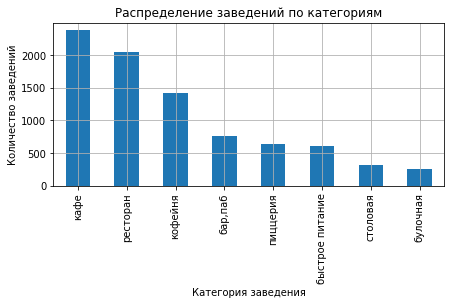

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из всех категориий преобладают кафе, ресторан, кофейня — теперь это хорошо видно. Категории булочная и столовая представлены меньше всего.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [43]:
# Распределение заведений по районам:
df.groupby('district')['id'].nunique().sort_values(ascending=False)

district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64

In [44]:
# Соотношение заведений по районам
display(df['district'].value_counts(normalize=True))
display()

Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: district, dtype: float64

Больше всего заведений в Центральном административном районе - 2242 заведения. Меньше всего - в Юго-Западном районе - 709 заведений.

Для визуального анализа распределения используем столбчатые диаграммы. Визуализируем распределение в столбце `district`:

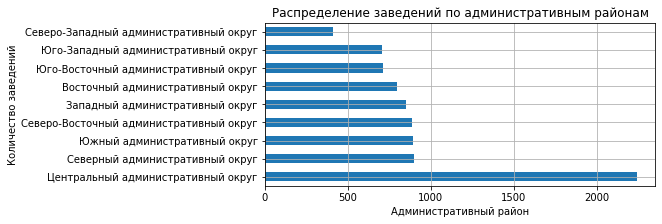

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по административным районам'
)

# Настраиваем оформление графика
plt.xlabel('Административный район')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Отдельно рассмотрим распределение заведений в Центральном административном округе Москвы. 

In [46]:
# Отфильтруем данные по району
district_df = df.loc[(df['district']== 'Центральный административный округ')]


In [47]:
# Посчитаем количество заведений для каждой категории
print('Распределение заведений по категориям:')
district_df.groupby('category')['id'].nunique().sort_values(ascending=False)

Распределение заведений по категориям:


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

Больше всего заведений в категории ресторан - 670 заведений, меньше всего в категории булочная - 50 заведений.

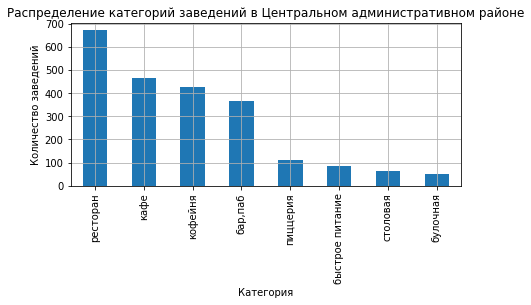

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
district_df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90,
               legend=False, # Выключаем легенду
               title=f'Распределение категорий заведений в Центральном административном районе'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В Центральном административном районе большинство заведений относиться к категории ресторан. Меньше всего в категории - булочная.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

Посмотрим соотношение сетевых и несетевых заведений в целом:

In [49]:
display(df['chain'].value_counts(normalize=True))
display()

0    0.618827
1    0.381173
Name: chain, dtype: float64

Сетевых заведений намного меньше - 38%, несетевых заведений- 62%.

In [50]:
display(df['chain'].value_counts())
display()

0    5200
1    3203
Name: chain, dtype: int64

По количеству: несетевых 5200 заведений, сетевых - 3203 заведения.

Результаты value_counts() визуализируем с помощью столбчатой диаграммы. Посмотрим на распределение доли заведений по столбцу chain:

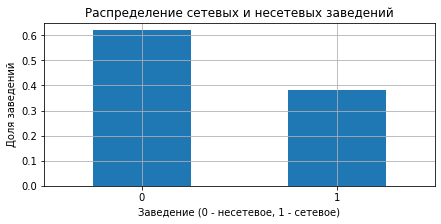

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Заведение (0 - несетевое, 1 - сетевое)')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

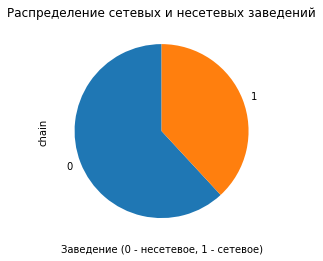

In [52]:
# построим круговую диаграмму
df['chain'].value_counts(normalize=True).plot.pie(startangle=90)
plt.title('Распределение сетевых и несетевых заведений')
plt.xlabel('Заведение (0 - несетевое, 1 - сетевое)')
plt.show()

Теперь Посмотрим соотношение сетевых и несетевых заведений в разрезе категорий в количестве и в долях:

In [53]:
df_unstack_part = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
df_unstack=df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
rezult=df_unstack_part.merge(df_unstack, on='category',suffixes=('_part','_сount'))
rezult

chain,0_part,1_part,0_сount,1_сount
category,,,,
"бар,паб",0.780105,0.219895,596,168
булочная,0.386719,0.613281,99,157
быстрое питание,0.615257,0.384743,371,232
кафе,0.672276,0.327724,1598,779
кофейня,0.490446,0.509554,693,720
пиццерия,0.478673,0.521327,303,330
ресторан,0.642997,0.357003,1313,729
столовая,0.720635,0.279365,227,88


Представим эти данные в виде столбчатой диаграммы

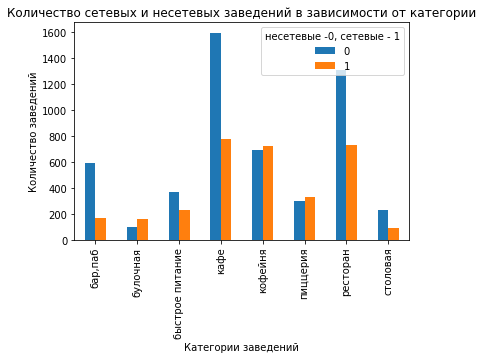

In [54]:
df_unstack.plot(kind='bar',rot=90)

# Настраиваем график
plt.title('Количество сетевых и несетевых заведений в зависимости от категории') # Заголовок диаграммы
plt.ylabel('Количество заведений') # Подписываем ось Y
plt.xlabel('Категории заведений') # Подписываем ось X
plt.legend(title='несетевые -0, сетевые - 1')  # Легенда для разбивки

# Отображаем график
plt.show()

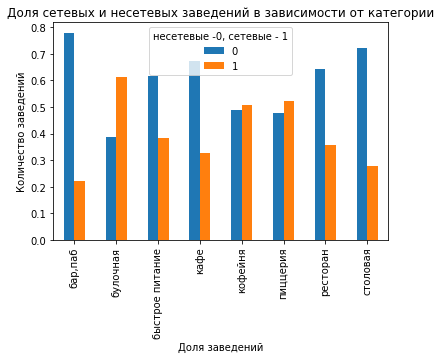

In [55]:
df_unstack_part.plot(kind='bar',rot=90)

# Настраиваем график
plt.title('Доля сетевых и несетевых заведений в зависимости от категории') # Заголовок диаграммы
plt.ylabel('Количество заведений') # Подписываем ось Y
plt.xlabel('Доля заведений') # Подписываем ось X
plt.legend(title='несетевые -0, сетевые - 1')  # Легенда для разбивки

# Отображаем график
plt.show()

Категории, в которых преобладают несетевые заведения: бар/паб -78% (596 заведений), столовая - 72% (227 заведений), кафе - 67% (1598 заведений), ресторан - 64% (1313 заведений), быстрое питание -61% (371 заведение). 

В остальных катгориях преобладают сетевые заведения: булочная - 61% (157 заведений),пиццерия - 52% (330 заведения), кофейня - 51% (720 заведений).

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Проверим данные на аномальные значения и выбросы. 


Чтобы посмотреть выбросы, используем диаграмму размаха, или «ящик с усами» (boxplot()). 

Построим диаграмму размаха («ящик с усами»), при этом установим фильтр больше 0, так как в этом столбце содержаться индикаторные значения -1

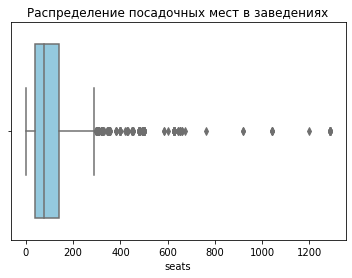

In [56]:
sns.boxplot(data=df[df['seats']>=0], x='seats',color='skyblue')

plt.title('Распределение посадочных мест в заведениях')
plt.xticks(rotation=0)
plt.show()

Построим диаграмму размаха («ящик с усами»), при этом установим фильтр больше 0,отключим выбросы (showfliers=False)

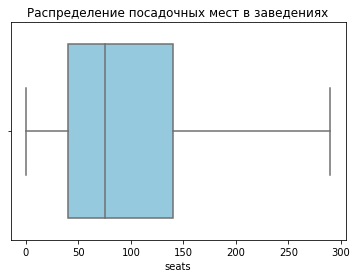

In [57]:
sns.boxplot(data=df[df['seats']>=0], x='seats',showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в заведениях')
plt.xticks(rotation=0)
plt.show()

Видно,что в данных есть выбросы, примерно после отметки 300 мест. Скорее всего выбросы связаны с ошибочно внесенными данными, так же это могут быть указаны посадочные места всей сети. Посмотрим по категориям, возможно выбросы сосредоточены в какой то одной категории. Данные имеют правосторонее распределение. Основноые колличество посадочных мест сосредоточено в интервале от 40 до 140 мест. Медианное значение - примерно 75.
Распределение характеризуется широким разбросом и «хвостами» как в левой, так и в правой части гистограммы. Такие низкие и высокие значения можно отнести к выбросам. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, и такое количество посадочных мест вполне допустимо. Поэтому при анализе данных их оставим.

Сразу отфильтруем более 0 (исключая индикаторные знаxения -1),а также отключим выбросы (showfliers=False) что бы посмотреть подробнее

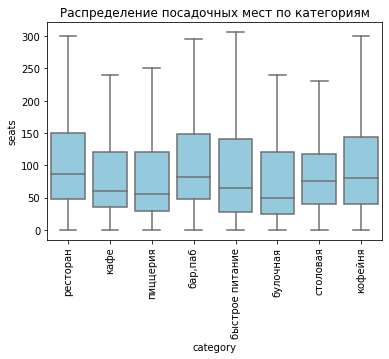

In [58]:
sns.boxplot(data=df[df['seats']>=0], y='seats', x='category', showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест по категориям')
plt.xticks(rotation=90)
plt.show()

- По общему виду можно сказать, что данные представляют имеют склонность к правостороннее распределение.
- Самое низкое медианное значение у категории булочная.
- Самое большое распределение данных в категориях рксторан, бар/паб, быстрое питание, кофейня.
- В категориях кафе, пиццерия, булочная, столовая, вариация данных чуть меньше распределение данных.


Отфильтруем данные по катеории, оставим только те строки, которые относятся к кафе и исключим  выбросы для подробного анализа

In [59]:
category_df = df.loc[(df['category']=='кафе')]

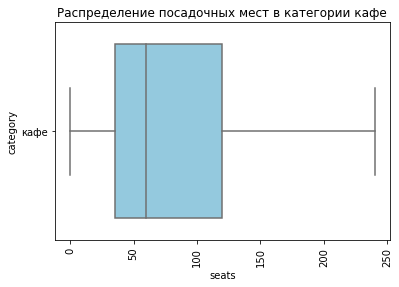

In [60]:
sns.boxplot(data=category_df[category_df['seats']>=0], x='seats', y=category_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории кафе')
plt.xticks(rotation=90)
plt.show()

- В категории кафе данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 250;
- Медиана, она же 2-й квартиль или 50-й процентиль - 60;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 40;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -120.

Отфильтруем данные по катеории, оставим только те строки, которые относятся к категории ресторан и исключим  выбросы для подробного анализа

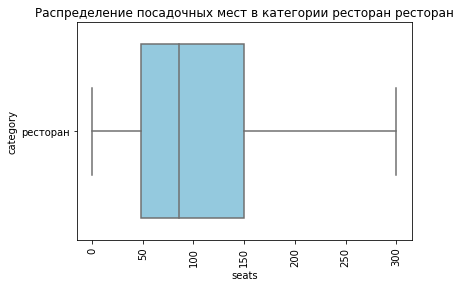

In [61]:
restaurant_df = df.loc[(df['category']=='ресторан')]

sns.boxplot(data=restaurant_df[restaurant_df['seats']>=0], x='seats', y=restaurant_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории ресторан ресторан')
plt.xticks(rotation=90)
plt.show()

- В категории ресторан данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 300;
- Медиана, она же 2-й квартиль или 50-й процентиль - 85;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 50;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -150.

Отфильтруем данные по катеории, оставим только те строки, которые относятся к категории пиццерия и исключим  выбросы для подробного анализа

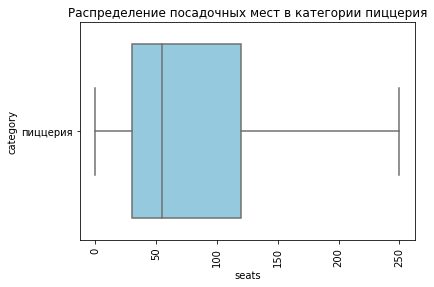

In [62]:
pizzeria_df = df.loc[(df['category']=='пиццерия')]

sns.boxplot(data=pizzeria_df[pizzeria_df['seats']>=0], x='seats', y=pizzeria_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории пиццерия')
plt.xticks(rotation=90)
plt.show()

- В категрии пиццерия данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 250;
- Медиана, она же 2-й квартиль или 50-й процентиль - 55;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 30;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -130.

Отфильтруем данные по катеории, оставим только те строки, которые относятся к категории бар и исключим  выбросы для подробного анализа

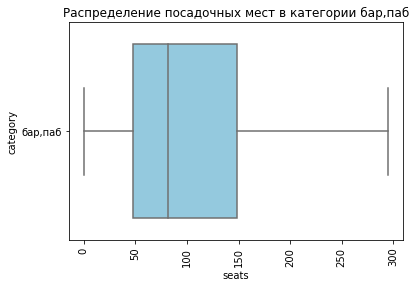

In [63]:
bar_df = df.loc[(df['category']=='бар,паб')]

sns.boxplot(data=bar_df[bar_df['seats']>=0], x='seats', y=bar_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории бар,паб')
plt.xticks(rotation=90)
plt.show()

- В категрии бар,паб данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 300;
- Медиана, она же 2-й квартиль или 50-й процентиль - 80;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 50;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -150.

Отфильтруем данные, оставим только те строки, которые относятся к категории быстрое питание и исключим  выбросы для подробного анализа

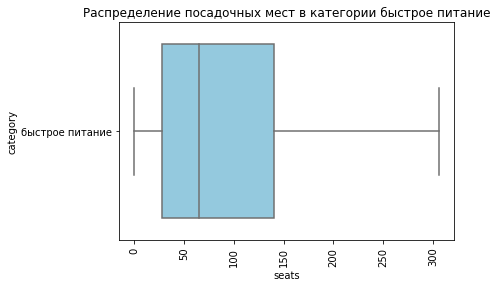

In [64]:
fast_food_df = df.loc[(df['category']=='быстрое питание')]

sns.boxplot(data=fast_food_df[fast_food_df['seats']>=0], x='seats', y=fast_food_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории быстрое питание')
plt.xticks(rotation=90)
plt.show()

- В категрии пиццерия данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 300;
- Медиана, она же 2-й квартиль или 50-й процентиль - 60;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 30;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -140.

Отфильтруем данные, оставим только те строки, которые относятся к категории булочная и исключим  выбросы для подробного анализа

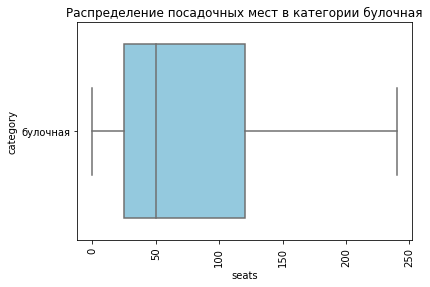

In [65]:
bakery_df = df.loc[(df['category']=='булочная')]

sns.boxplot(data=bakery_df[bakery_df['seats']>=0], x='seats', y=bakery_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории булочная')
plt.xticks(rotation=90)
plt.show()

- В категории булочная данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 250;
- Медиана, она же 2-й квартиль или 50-й процентиль - 50;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 30;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -120.

Отфильтруем данные, оставим только те строки, которые относятся к категории булочная и исключим  выбросы для подробного анализа

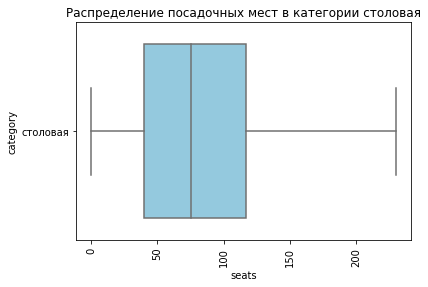

In [66]:
dining_df = df.loc[(df['category']=='столовая')]

sns.boxplot(data=dining_df[dining_df['seats']>=0], x='seats', y=dining_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории столовая')
plt.xticks(rotation=90)
plt.show()

- В категрии столовая данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 250;
- Медиана, она же 2-й квартиль или 50-й процентиль - 75;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 40;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -120.

Отфильтруем данные, оставим только те строки, которые относятся к категории кофейня и исключим  выбросы для подробного анализа

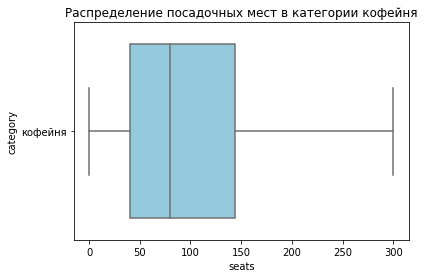

In [67]:
coffee_df = df.loc[(df['category']=='кофейня')]

sns.boxplot(data=coffee_df[coffee_df['seats']>=0], x='seats', y=coffee_df['category'],showfliers=False,color='skyblue')

plt.title('Распределение посадочных мест в категории кофейня')
plt.show()

- В категрии кофейня данные имеют правосторонее распределение.
- Наименьшее значение в выборке, или минимум без учёта аномалий - 0;
- Наибольшее значение в выборке, или максимум без учёта аномалий - 300;
- Медиана, она же 2-й квартиль или 50-й процентиль - 80;
- Нижний квартиль Q1 (25-й процентиль) обозначается левой границей «ящика»- 45;
- Верхний квартиль Q3 (75-й процентиль) обозначается правой границей «ящика» -145.

Самая большая верхняя граница посадочных мест в категориях Ресторан, бар/паб, кофейня - 150 посадочных мест. Самая низкая - у категории булочная, пиццерия, быстрое питание, примерно 30 посадочных мест. Самое широкое распределение посадочных мест в категории бвстрое питание от 30 до 150 посадочных мест. 

---

### Задача 5

Исследуем рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. 

In [68]:
# соритируем данные по убыванию, с помощью sort_values(ascending=False)
print('Рейтинг заведений:')
rating_df=df.groupby('category')['rating'].mean().sort_values(ascending=False)
rating_df

Рейтинг заведений:


category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float64

Можно сказать, что средние рейтинги несильно отличаются по категориям заведений, средняя оценка 4.  Однако у категории паб,бар рейтинг чуть выше - 4,39, у категории быстрое питание рейтинг чуть ниже - 4,05. 

Визуализируем распределение средних рейтингов по категориям:

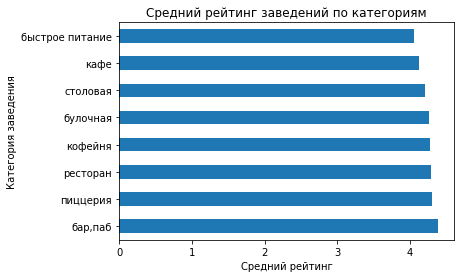

In [69]:
rating_df.plot(kind='barh',rot=0)

# Настраиваем график
plt.title('Средний рейтинг заведений по категориям') # Заголовок диаграммы
plt.ylabel('Категория заведения') # Подписываем ось Y
plt.xlabel('Средний рейтинг') # Подписываем ось X


# Отображаем график
plt.show()

Из визуализации также видно, что средние ретинги практически одинаковые у всех категорий заведений.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. 

Рассчитаем корреляционную матрицу для нескольких столбцов в датасете df. Так как данные числовые и категориальные будем применять коэффициенте phi_k из библиотеки phik. Он измеряет степень отличия связи между переменными от случая независимости.
Коэффициент phi_k разработан как обобщение для разных типов данных. Он анализирует, насколько сильно две переменные связаны, независимо от их природы: числовые, категориальные и даже смешанные. Коэффициент поможет определить как линейные, так и нелинейные зависимости, поэтому его можно гибко применять, что как раз нужно в нашем случае. 

In [70]:
# построим матрицу кореляции
correlation_matrix = df[['rating','category', 'district', 'chain','seats','price','is_24_7']].phik_matrix()

# Выводим результаты
display('Корреляционная матрица с коэффициентом phi_k:')
display(correlation_matrix) 

interval columns not set, guessing: ['rating', 'chain', 'seats']


'Корреляционная матрица с коэффициентом phi_k:'

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189904,0.200701,0.108060,0.000000,0.290085,0.144805
category,0.189904,1.000000,0.174541,0.266054,0.059707,0.370537,0.230222
district,0.200701,0.174541,1.000000,0.064459,0.276210,0.200502,0.065899
chain,0.108060,0.266054,0.064459,1.000000,0.055026,0.111726,0.050783
seats,0.000000,0.059707,0.276210,0.055026,1.000000,0.056705,0.029527
price,0.290085,0.370537,0.200502,0.111726,0.056705,1.000000,0.060101
is_24_7,0.144805,0.230222,0.065899,0.050783,0.029527,0.060101,1.000000


Из матрицы видно, что рейтинг слабо выраженную кореляцию с ценовой категорией - 0,29. По остальным параметрам можно счиать, что кореляция отсутствует: расположение заведения -0,2, категориея заведения - 0,18 является ли заведение круглосуточным - 0,14, является ли заведение сетевым - 0,11, количество посадочных мест -0.  

Построим диаграмму размаха для столбцов `rating` и `category`

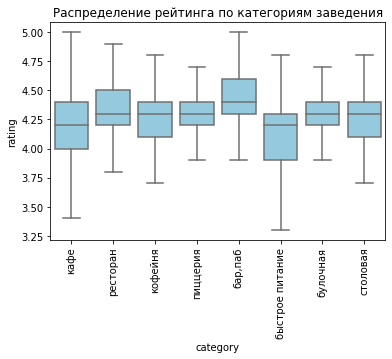

In [71]:
sns.boxplot(data=df, x='category', y=df['rating'],showfliers=False,color='skyblue')

plt.title('Распределение рейтинга по категориям заведения')
plt.xticks(rotation=90)
plt.show()

- для категории быстрое питание большинство оценок распределено низже среднего рейтинга, чем в других категориях -верхняя граница - 4,3, нижняя граница - 3,9, медиана 4,1.
- в категории бар/паб большинство оценок лежит выше среднего рейтинга - нижняя граница - 4,3, верхняя - 4,6, медиана - 4,4.
- В категории булочная самое маленько распределение среднего рейтинга: нижняя граница - 4,25, верхняя - 4,3, медиана - 4,35.
- В категории кафе самое большое распределение рейтинга: нижняя граница - 4,0, верхняя - 4,35, медиана - 4,2.

Построим диаграмму размаха для столбцов `rating` и `district`

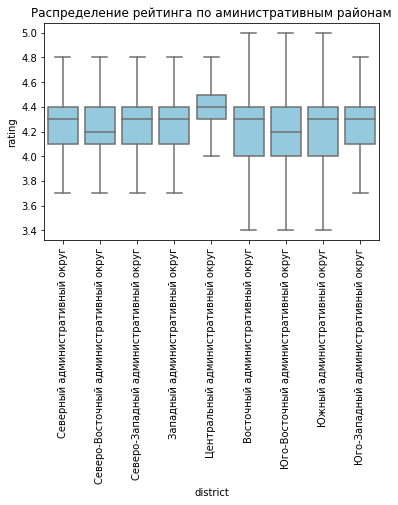

In [72]:
sns.boxplot(data=df, x='district', y='rating',showfliers=False,color='skyblue')

plt.title('Распределение рейтинга по аминистративным районам')
plt.xticks(rotation=90)
plt.show()

- В центральном районе оценки по рейтингу чуть выше ,чем в других районах.Нижняя граница - 4,3, верхняя граница - 4,5, медиана -4,4. 
- В районах: Северный, Северо-восточный, Северо-Западный, Западный - нижняя граница оценок чуть выше - 4,1, верхняя граница - 4,4. Медиана - 4,3, у Северо-Западного чуть ниже - 4,2.
- В районах: Восточный, Юго-Восточный, Южный - нижняя граница - 4,0, верхняя граница - 4,4, медиана в восточном и Южном - 4,3, Юго-Восточный -4,2, Юго-Западный -нижняя граница - 4,1, верхняя -4,4, медиана - 4,3. 

Постройте диаграмму размаха для столбцов `rating` и `chain`

No handles with labels found to put in legend.


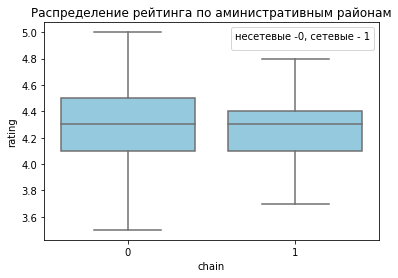

In [73]:
sns.boxplot(data=df, x='chain', y='rating',showfliers=False,color='skyblue')

plt.title('Распределение рейтинга по аминистративным районам')
plt.xticks(rotation=0)
plt.legend(title='несетевые -0, сетевые - 1')  # Легенда для разбивки
plt.show()

- В сетевых заведениях размах чуть меньше, чем в несетевых.
- В несетевых заведениях райтинг распределен равномерно, медианное значение находиться посередине - 4,3.
- В сетевых заведениях медианное значение - 4,3, но чуть больше оценок лежит ниже медианного значения.
- Нижние границы почти одинаковые - 4,1. верхняя нраница у несетевых - 4,5, сетевых - 4,4.

Построим диаграмму рассеяния для столбцов `rating` и `seats`

<AxesSubplot:title={'center':'Связь между рейтингом и количеством посадочных мест'}, xlabel='rating', ylabel='seats'>

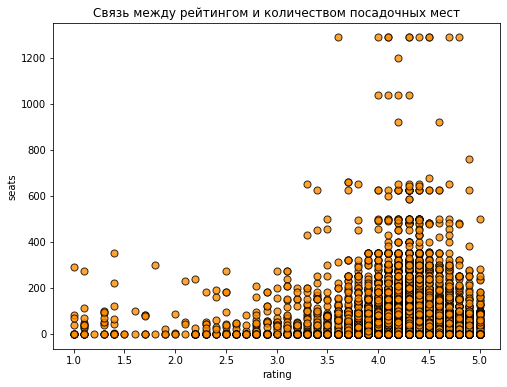

In [74]:
# Строим диаграмму рассеяния
df.plot(
    kind='scatter',
    x='rating',
    y='seats',
    figsize=(8, 6),    # Размер графика в дюймах
    s=50,               # Размер точек
    color='darkorange',    # Цвет точек (HEX-код)
    edgecolor='black',  # Цвет контура точек
    alpha=0.8,          # Прозрачность точек
    title='Связь между рейтингом и количеством посадочных мест')

- Тип связи. На диаграмме не наблюдается явно выраженной зависимости между rating и chain.
- Направление. Заметного положительного или отрицательного тренда нет, что может указывать на слабую или отсутствующую связь.
- Сила связи. В нижней-правой части графика высокая плотность точек — это может указывать на некоторую степень связи, но она явно нелинейная и слабая.
- Возможно в заведениях с большим количеством мест, выше рейтинг, т.е это может являться важным критерием для посетителей.

Построим диаграмму разброса для столбцов `rating` и `price`

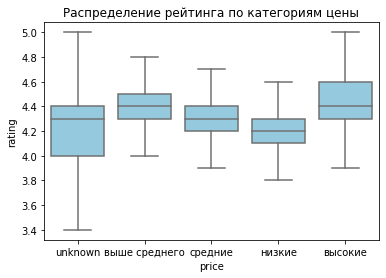

In [75]:
sns.boxplot(data=df, x='price', y='rating',showfliers=False,color='skyblue')

plt.title('Распределение рейтинга по категориям цены')
plt.xticks(rotation=0)
plt.show()

 Из диаграммы видно, что распределение более низкого рейтинга у заведений с низкими и средними ценами. Более высокий рейтинг у заведений с высокими ценами и выше среднего. Ветроятно из-за того,что в заведениях высокое качество сервиса.
- заведения с низкими ценами нижняя граница - 4.0, верхняя - 4,3, медиана - 4,2.
- заведения со средними ценами нижняя граница - 4,2, верхняя -4,4, медиана - 4,3.
- заведения с ценами выше среднего нижняя граница - 4,3, верхняя -4,5, медиана - 4,4.
- заведения с высокими ценами нижняя граница - 4,4, верхняя -4,6, медиана - 4,4.

Построим диаграмму разброса для столбцов `rating` и `is_24_7`

No handles with labels found to put in legend.


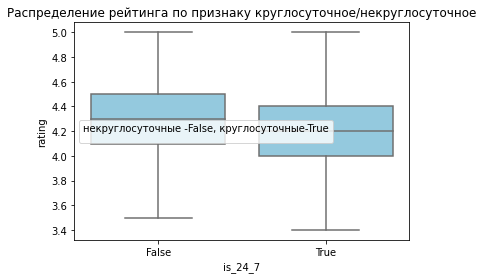

In [76]:
sns.boxplot(data=df, x='is_24_7', y='rating',showfliers=False,color='skyblue')

plt.title('Распределение рейтинга по признаку круглосуточное/некруглосуточное')
plt.xticks(rotation=0)
plt.legend(title='некруглосуточные -False, круглосуточные-True')  # Легенда для разбивки
plt.show()

- Из диаграммы видно, что ретинг заведений некруглосуточных чуть выше: Нижняя граница - 4,1, верхняя - 4,5, медиана - 4,3.
Для круглосуточных: нижняя - 4,0, верхняя - 4,4, медиана - 4,2.    

Вывод:
- Если раасматривать по категориям, распределение высоких оценок у категории паб/бар, более низкое распределение в категории быстрое питание. 
- Если рассматривать по расположению - в центральном районе распределены более высокие оценки. В других района оценки распределены примерно одинаково.
- Если рассматривать заведения с точки зрения сетевых/несетевых, то распределение оценок в несетевых шире, но медианное значение одинаковое. 
- Если рассматривать по категориям цен, то выше распределение рейтинга у заведений с высокими и и ценами выше среднего. Чуть ниже распределение рейтинга в заведениях с ценами низкими и средними.
- Если рассматривать по признаку круглосуточное/некруглосуточное, то в несетевых заведениях распределение и медиана чуть выше, чем в заведениях круглосуточных.
- Если рассматривать рейтинг по количеству посадочных мест, более высокий рейтинг сосредоточен в заведених с большим количеством посадочных мест.


---

### Задача 7

Сгруппируем данные по названиям заведений и найдием топ-15 популярных сетей в Москве. Для начала Отфильтруем данные по катеории, оставим только те строки, которые относятся к категории сетевые заведения

In [77]:
chain_df = df.loc[(df['chain']==1)]

In [78]:
# сгруппируем данные по названию заведения, отсортируем их по количеству в порядке убывания
name_df=chain_df.groupby('name')['chain'].sum().sort_values(ascending=False)
# выведем топ-15 популярных сетей в Москве
top_df= name_df.iloc[0:15]
top_df

name
шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му-му                                   27
Name: chain, dtype: int64

In [79]:
# получаем названия заведения в виде списка
top_df=top_df.index

In [80]:
# используем список top_df, чтобы отфильтровать все лишние заведения
top_name_df = df[df['name'].isin(top_df)]
top_name_df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
13,aea18265b0a0415893f1e796b82568fe,буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180,unknown,unknown,-1.0,-1.0,False
23,78709462f2b3480f825489a5321a3563,буханка,булочная,"Москва, Лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",4.7,1,-1,unknown,unknown,-1.0,-1.0,False
32,4e5314c970cc47c58e5d24ee3ee70fa9,додо пицца,пиццерия,"Москва, Коровинское шоссе, 23, корп. 1",Северный административный округ,"ежедневно, 09:00–23:00",4.3,1,46,низкие,Средний счёт:328 ₽,328.0,-1.0,False
34,629ac86faa0b4ca49eda1ee27cbda5bb,домино'с пицца,пиццерия,"Москва, Клязьминская улица, 11, корп. 4",Северный административный округ,"ежедневно, 10:00–23:00",4.2,1,247,средние,Средний счёт:от 500 ₽,500.0,-1.0,False
46,bab2d0dc722a45a3b20307527c7337cc,cofefest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,3.6,1,-1,unknown,unknown,-1.0,-1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,4c3dff32a1fc45d28eefe78f72c0df4c,теремок,ресторан,"Москва, Ореховый бульвар, 15",Южный административный округ,"ежедневно, 10:00–22:00",3.7,1,0,unknown,unknown,-1.0,-1.0,False
7974,2a0b895bbfec4aaf85510cb677522e47,хинкальная,ресторан,"Москва, улица Генерала Белова, 23А",Южный административный округ,"ежедневно, 12:00–00:00",3.6,1,60,unknown,unknown,-1.0,-1.0,False
7979,ca3f03ddc11d41128968a6586a40e3fe,яндекс лавка,ресторан,"Москва, Шипиловский проезд, 65, корп. 1",Южный административный округ,"ежедневно, 07:00–00:00",3.5,1,75,unknown,unknown,-1.0,-1.0,False
7980,bc4e388dec094056addf94f2e5b6f23a,яндекс лавка,ресторан,"Москва, улица Маршала Захарова, 2",Южный административный округ,"ежедневно, 07:00–00:00",4.0,1,200,unknown,unknown,-1.0,-1.0,False


In [81]:
# Создаём сводную таблицу по отфильтрованным данным
pivot_table = pd.pivot_table(top_name_df, 
                             values = ['chain', 'rating'],
                             index = ['name', 'category'],
                             aggfunc = {'chain' : 'sum', 'rating' : 'mean'})


pivot_table


chain    rating
name                                category                        
cofefest                            кафе                 1  4.200000
                                    кофейня             31  3.977419
cofix                               кофейня             65  4.075385
one price coffee                    кофейня             71  4.069444
prime                               кафе                 1  4.200000
                                    ресторан            49  4.114286
буханка                             булочная            25  4.416000
                                    кафе                 1  4.300000
                                    кофейня              6  4.333333
додо пицца                          пиццерия            74  4.286486
домино'с пицца                      пиццерия            76  4.171429
кофепорт                            кофейня             42  4.147619
кулинарная лавка братьев караваевых кафе                39  4.394872
му-му                               бар,паб              1  4.300000
                                    быстрое питание      2  4.200000
                                    кафе                12  4.216667
                                    кофейня              2  4.250000
                                    пиццерия             1  4.300000
                                    ресторан             8  4.262500
                                    столовая             1  4.000000
теремок                             быстрое питание      2  4.450000
                                    ресторан            36  4.105556
хинкальная                          бар,паб              3  4.333333
                                    быстрое питание      6  4.366667
                                    кафе                19  4.352632
                                    ресторан            15  4.273333
                                    столовая             1  4.200000
чайхана                             быстрое питание      2  4.300000
                                    кафе                26  3.946154
                                    ресторан             9  3.777778
шоколадница                         кафе                 1  4.100000
                                    кофейня            119  4.178151
яндекс лавка                        ресторан            69  3.872464

Таким образом получили список топ-15 популярных сетей в Москве. Видим,что у некоторых сетей указана разная категория. В качестве рекомендации тут можно посмотреть в общедоступной информации к какой категории относится заведение и присвоить ей верную категорию.

Визуализируем распределение средних рейтингов по названиям заведений, попавших в топ-15 заведений по Москве:

In [82]:
# соритируем данные по убыванию, с помощью sort_values(ascending=False)
name_rating_df=top_name_df.groupby('name')['rating'].mean().sort_values(ascending=False)
name_rating_df

name
буханка                                4.396875
кулинарная лавка братьев караваевых    4.394872
хинкальная                             4.322727
додо пицца                             4.286486
му-му                                  4.229630
шоколадница                            4.177500
домино'с пицца                         4.171429
кофепорт                               4.147619
теремок                                4.123684
prime                                  4.116000
cofix                                  4.075385
one price coffee                       4.069444
cofefest                               3.984375
чайхана                                3.924324
яндекс лавка                           3.872464
Name: rating, dtype: float64

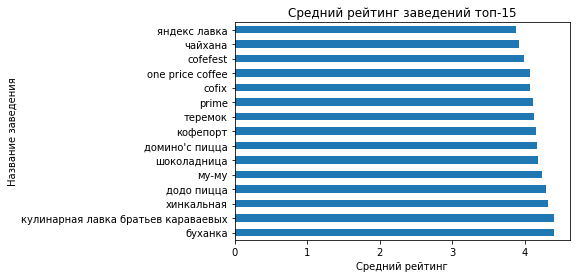

In [83]:
# строим график
name_rating_df.plot(kind='barh',rot=0)

# Настраиваем график
plt.title('Средний рейтинг заведений топ-15') # Заголовок диаграммы
plt.ylabel('Название заведения') # Подписываем ось Y
plt.xlabel('Средний рейтинг') # Подписываем ось X


# Отображаем график
plt.show()

Самый высокий рейтинг с заведения Буханка - 4,39 и кулинарная лавка братьев караваевых - 4,39. Ниже всех из этого списка у Яндекс Лавки- 3,87. В целом средний рейтинг распределен равномерно.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других.


In [84]:
# посмотрим вариации среднего чека по районам
print('Вариации среднего чека по районам:')
dist_df=df[df['middle_avg_bill']>=0].groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
dist_df

Вариации среднего чека по районам:


district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

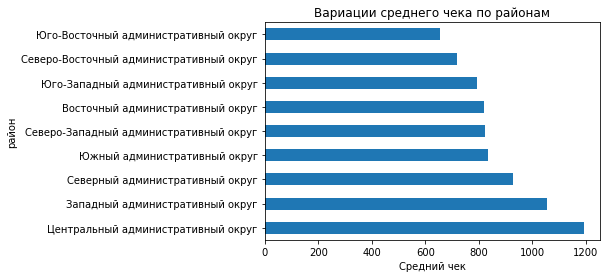

In [85]:
dist_df.plot(kind='barh',rot=0)

# Настраиваем график
plt.title('Вариации среднего чека по районам') # Заголовок диаграммы
plt.xlabel('Средний чек') # Подписываем ось X
plt.ylabel('район') # Подписываем ось y

# Отображаем график
plt.show()

Видно,что самый высокий средний чек в Центральном районе - 1191 руб, что очевидно, так как центре всегда цены выше, это связано и с арендой площадей и уровнем заработных плат персоналу. А также в Западном районе - 1053 руб. Самый маленький средний чек в Юго-Восточном районе - 654 руб.

Проанализируем цены в Центральном административном округе.

Для этого постороим гистограмму. Гистограмма сильно зависит от размера корзин, что может существенно исказить представление о распределении данных.Поэтому будем использовать параметр kde, он решает эти проблемы — с его помощью получается плавное представление, которое подстраивается под реальное распределение в данных.

In [86]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
сentre_df = df.loc[(df['district']=='Центральный административный округ') & (df['middle_avg_bill']>=0)]

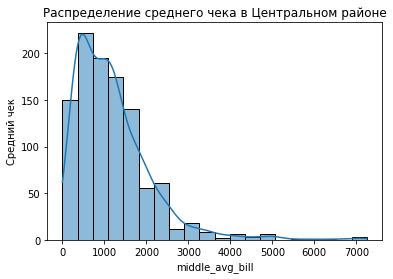

In [87]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=сentre_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Центральном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца `middle_avg_bill` сосредоточено в диапазоне 500–1500.
- Пик линии KDE соответствует наиболее частотным значениям (около 500), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE с обеих сторон показывают, что есть меньшая вероятность встретить значения ниже 500 или выше 1500, хотя такие значения встречаются.

Проанализируем цены в Западном административном округе.

In [88]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
western_df = df.loc[(df['district']=='Западный административный округ') & (df['middle_avg_bill']>=0)]

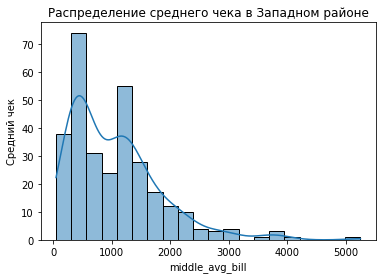

In [89]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=western_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Западном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill лежит в районе 300-350.
- Пик линии KDE соответствует наиболее частотным значениям (около 350), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE с обеих сторон показывают, что есть меньшая вероятность встретить значения ниже 300 или выше 350, хотя такие значения встречаются. Хотя в диапазоне 1100 - встречаеться достаточно много цен.

Проанализируем цены в Северном административном округе.

In [90]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
north_df = df.loc[(df['district']=='Северный административный округ') & (df['middle_avg_bill']>=0)]

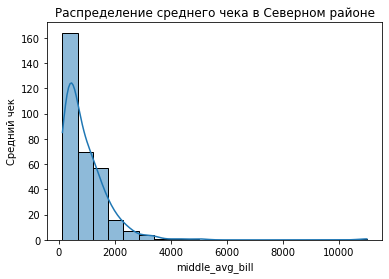

In [91]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=north_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Северном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 300–400.
- Пик линии KDE соответствует наиболее частотным значениям (около 300), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 400, хотя такие значения встречаются, так же большая вероятность встретить цены ниже 300.

Проанализируем цены в Северо-Западном административном округе

In [92]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
n_w_df = df.loc[(df['district']=='Северо-Западный административный округ') & (df['middle_avg_bill']>=0)]

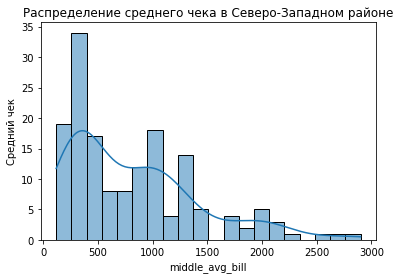

In [93]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=n_w_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Северо-Западном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 300–400.
- Пик линии KDE соответствует наиболее частотным значениям (около 315), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 400 и ниже 300, хотя такие значения встречаются.

Проанализируем цены в Южном административном округе

In [94]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
south_df = df.loc[(df['district']=='Южный административный округ') & (df['middle_avg_bill']>=0)]

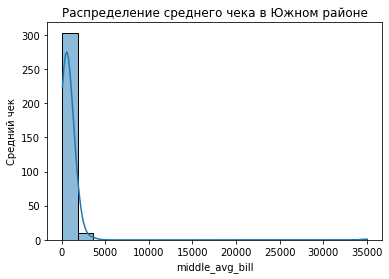

In [95]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=south_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Южном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 200–300.
- Пик линии KDE соответствует наиболее частотным значениям (около 250), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 200 и ниже 300, хотя такие значения встречаются, но их очень немного. Вероятно по этому району недостоточно данных, так как вариаций очень мало

Проанализируем цены в Восточном административном округе

In [96]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
east_df = df.loc[(df['district']=='Восточный административный округ') & (df['middle_avg_bill']>=0)]

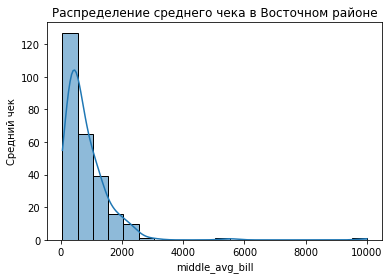

In [97]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=east_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Восточном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 300–400.
- Пик линии KDE соответствует наиболее частотным значениям (около 300), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 300 и ниже 400, хотя такие значения встречаются, но их очень немного.

Проанализируем цены в Юго-Западном административном округе

In [98]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
s_w_df = df.loc[(df['district']=='Юго-Западный административный округ') & (df['middle_avg_bill']>=0)]

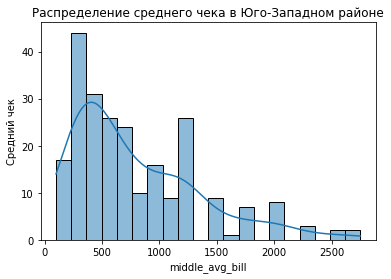

In [99]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=s_w_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Юго-Западном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 350–450.
- Пик линии KDE соответствует наиболее частотным значениям (около 300), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 300 и ниже 400, хотя такие значения встречаются,так же есть вариации со средним чеком ориентировочно 1200.

Проанализируем цены в Северо-Восточном административном округе

In [100]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
n_e_df = df.loc[(df['district']=='Северо-Восточный административный округ') & (df['middle_avg_bill']>=0)]

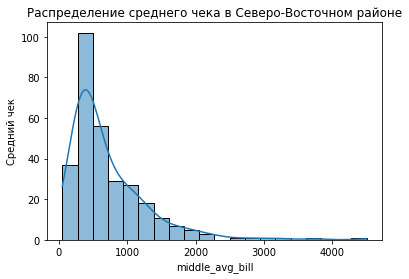

In [101]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=n_e_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Северо-Восточном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 300–400.
- Пик линии KDE соответствует наиболее частотным значениям (около 350), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 350 и ниже 400, хотя такие значения встречаются.

Проанализируем цены в Юго-Восточном административном округе

In [102]:
# отфильтруем данные по району и исключим индикаторные знаяения -1
s_e_df = df.loc[(df['district']=='Юго-Восточный административный округ') & (df['middle_avg_bill']>=0)]

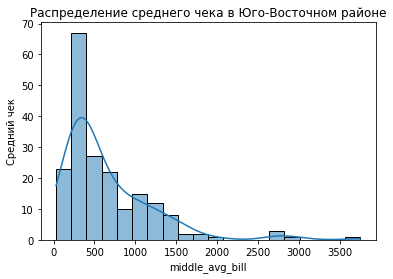

In [103]:
# Построим распределение данных в столбце middle_avg_bill
sns.histplot(data=s_e_df, x='middle_avg_bill',bins=20, kde=True)

# Подписываем и отображаем график
plt.title('Распределение среднего чека в Юго-Восточном районе')
plt.ylabel('Средний чек')
plt.show()

- На графике распределения большинство значений столбца middle_avg_bill сосредоточено в диапазоне 300–450.
- Пик линии KDE соответствует наиболее частотным значениям (около 350), что указывает на высокую концентрацию данных в этом интервале.
- Хвосты линии KDE показывают, что есть меньшая вероятность встретить значения выше 350 и ниже 450, хотя такие значения встречаются

Рассмотрим, как удалённость от центра влияет на цены в заведениях. Результат сопроводите подходящими визуализациями.

Рассчитаем корреляционную матрицу для столбцов с ценовыми показателями и положением заведения в датасете df, будем применять коэффициенте phi_k из библиотеки phik. 

In [104]:
# построим матрицу кореляции
correlation_matrix_price = df[['district','middle_avg_bill', 'middle_coffee_cup','avg_bill','price']].phik_matrix()

# Выводим результаты
display('Корреляционная матрица с коэффициентом phi_k:')
display(correlation_matrix_price) 

interval columns not set, guessing: ['middle_avg_bill', 'middle_coffee_cup']


'Корреляционная матрица с коэффициентом phi_k:'

,district,middle_avg_bill,middle_coffee_cup,avg_bill,price
district,1.000000,0.051995,0.053590,0.218122,0.200502
middle_avg_bill,0.051995,1.000000,0.000000,1.000000,0.376509
middle_coffee_cup,0.053590,0.000000,1.000000,1.000000,0.177032
avg_bill,0.218122,1.000000,1.000000,1.000000,0.994285
price,0.200502,0.376509,0.177032,0.994285,1.000000


Из матрицы видно, что между положением заведения и ценовой категорией, средней ценой есть небольшая зависимость.

Построим диаграмму размаха для распределения среднего чека, исключим индикаторные значения -1

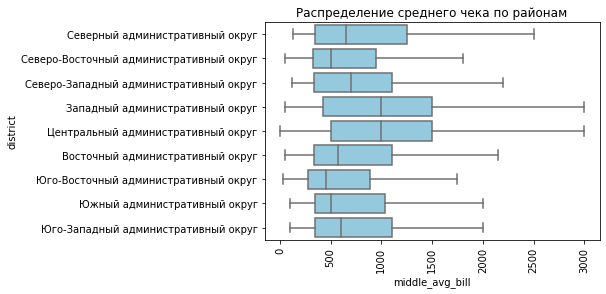

In [105]:
# диаграмма размаха
sns.boxplot(data=df[df['middle_avg_bill']>=0], x='middle_avg_bill', y='district',showfliers=False,color='skyblue')

plt.title('Распределение среднего чека по районам')
plt.xticks(rotation=90)
plt.show()

- Западный и Центральный район имеют самую высокую верхнюю границу - 1500, и медианное значение - 1000. При этом она делит данные почти наполовину.
- Самые низкие границы у Юго-Восточного района -нижняя граница -300, верхняя - 900, и самая низкая медиана -400.  

Строим диаграмму размаха для распределения средней стоимости чашки кофе, исключим индикаторные значения -1

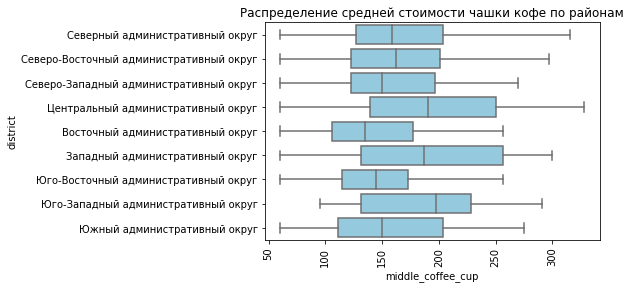

In [106]:
# диаграмма размаха
sns.boxplot(data=df[df['middle_coffee_cup']>=0], x='middle_coffee_cup', y='district',showfliers=False,color='skyblue')

plt.title('Распределение средней стоимости чашки кофе по районам')
plt.xticks(rotation=90)
plt.show()

- В Центральном районе и Западном, данные распределены почти одинаково: нижняя граница 140-150, верхняя  250-260, медиана - 190.
- Самое большое значение медианы у Юго-Западного района - 200.    
- Самое маленькое распределение средних цен за чашку кофе в Юго-Восточном районе - медиана - 140, верхняя граница - 175, нижняя - 120.    

---

### Промежуточный вывод


- Основная часть заведений в исследуемых данных представлена в категорр кафе -28% (2377 заведений). ресторан - 24% (2042 заведения) и кофейня - 1413 заведений. Меньше всего в категории булочная - 256 заведений и столовая - 315 заведений.
- Больше всего заведений в Центральном административном районе - 2242 заведения. Меньше всего - в Юго-Западном районе - 709 заведений. Центр: Больше всего заведений в категории ресторан - 670 заведений, меньше всего в категории булочная - 50 заведений.
- Больше всего несетевых заведений 5200, сетевых - 3203 заведения. В несетевых заведениях больше всего преобладают такие категории: бар/паб -78% (596 заведений), столовая - 72% (227 заведений), кафе - 67% (1598 заведений), ресторан - 64% (1313 заведений), быстрое питание -61% (371 заведение).В остальных катгориях преобладают сетевые заведения: булочная - 61% (157 заведений),пиццерия - 52% (330 заведения), кофейня - 51% (720 заведений).
- При анализе данных по количеству посадочных мест отпределили, что в них есть вбросы, аномальные значения. Скорее всего выбросы связаны с ошибочно внесенными данными, так же это могут быть указаны посадочные места всей сети. Основноые колличество посадочных мест сосредоточено в интервале от 40 до 140 мест. Медианное значение - примерно 75. 
- Рассмотрели средние рейтинги заведений: средние рейтинги несильно отличаются по категориям заведений, средняя оценка 4. Однако у категории паб,бар рейтинг чуть выше - 4,39 , у категории быстрое питание рейтинг чуть ниже - 4,05.
- Составиди матрицу корреляции: рейтинг показывает более сильную связь с ценовой категорией - 0,29, категорией заведения - 0,18 и являеться ли заведение круглосуточным - 0,14. Есть чуть меньшая связь с признаком,являеться ли заведение сетевым - 0,11.Также определили,что рейтинг выше, при большем количестве посадочных мест.
- Самый высокий средний чек в Центральном районе - 563 руб, что очевидно, так как центре всегда цены выше, это связано и с арендой площадей и уровнем заработных плат персоналу. Самый маленький средний чек в Юго-Восточном районе - 177 руб. Но если посмотреть по распределению среднего чека и средней стоимостью , в Западном районе оно очень похоже


## 4. Итоговый вывод и рекомендации


В ходе исследования проанализировали данные заведений общественного питания г. Москвы.

В данных содержалось 8406 заведений из 9 административных округов Москвы: Центральный административный округ, Западный , Северный ,Северо-Западный ,Южный , Восточный ,Юго-Западный, Северо-Восточный , Юго-Восточный.
Данные включали информацию о заведениях общественного питания и информацию о среднем чеке в заведениях общественного питания. 
Акцент исследования был на том, чтобы проанализировать заведения общественного питания, их расположения, цены и категории, эти данные помогут определиться с  открытием заведения общественного питания в Москве. 

Исследовательский анализ данных позволил сформировать основные критерии заведений общественного питания:
- Основная часть заведений в исследуемых данных представлена в категории кафе - 2377 заведений, ресторан -2042 заведения и кофейня - 1413 заведений. Меньше всего в категории булочная - 256 заведений и столовая - 315 заведений.
- Больше всего заведений в Центральном административном районе - 2242 заведения. Меньше всего - в Юго-Западном районе - 709 заведений. Если рассматривать Центральный район- больше всего заведений в категории ресторан - 670 заведений, меньше всего в категории булочная - 50 заведений.
- Из всех заведений по количеству больше всего несетевых- 5200 заведений, сетевых - 3203 заведения.
- Основноые колличество посадочных мест сосредоточено в интервале от 40 до 140 мест.
- средние рейтинги заведений на отметке 4 и выше. Выяснили, что есть связь между ценовой категорией заведения и оценкой пользователей. Это значит, что цена важный критерий для поситителей.
- Удаленность от центра влияет на цены. Видно, что самый высокий средний чек в Центральном районе - 1191 руб и Западном районе - 1053 руб, так как центре всегда цены выше, это связано и с арендой площадей и уровнем заработных плат персоналу. Самый маленький средний чек в Юго-Восточном районе - 654 руб

В качестве рекомендаций можно отметить:
- Рекомендуем при выборе категории заведения  опираться на самые популярные: Кафе (28%, 2378заведений) и ресторан (24%, 2043 заведений) – одини из самых популярных форматов общепита.
- Выяснили, что на прибыльность заведения очень влияет его местоположение. В исследовании показано,что от района зависит средний чек заведения, так самый высокий чек в Центральном районе - 1191 руб, ив  Западном районе - 1053 руб. Самый маленький средний чек в Юго-Восточном районе - 654 руб. В центральном районе сотредоточено больше проходных мест, туристических зон. Однако стоит изучите близлежащих конкурентов. Также в центральных районах много торговых центрах, поэтому если расположить заведение вблизи них или в самих ТЦ, не будет проблем с посетителями. Зато в отдаленных от центра района конкурентов не так много. Можно обратить внимание на Западный район, там меньше конкурентов: Центральный район 2242 заведения (27%), Западный район 850 заведений (10%).
- По колличеству посадочны мест, рекомендуем ориентироваться на средние значения от 40-140 посадочных мест.
- Что бы рейтинг заведения был на высоком уровне, советуем обратить внимание на такие параметры: ценовая категория, категория заведения, формат работы заведения (круглосуточное/некруглосуточное), количество посадочных мест. В исследовании видно,ретинг заведения и ценовая категория корелируют между собой, коэффициент кореляции -  0,29. Самый высокий ретинг посетители присваивают категориям бар/паб - 4,3-4,6, заведениям с большим количеством посадочных мест - 4,3-4,6, более высокий ретинг у заведений некруглосуточных - 4,1-4,3, чем у круглосуточных 4,0-4,2. Рейтинг у заведений с высокими ценами и выше среднего ( рейтинг 4,3-4,6), чем у заведений с низкими и средними ценами (4,0-4,4). 


